# Depth-limited Search, Iterative Deepening Search/ Iterative Deepening Depth First Search, Priority Queue, Uniform Cost Search (UCS)

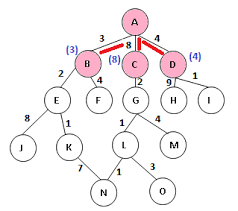

## Depth Limited Search

### Algorithm:

// Returns true if target is reachable from
// src within max_depth
bool IDDFS(src, target, max_depth)
    for limit from 0 to max_depth
       if DLS(src, target, limit) == true
           return true
    return false   

bool DLS(src, target, limit)
    if (src == target)
        return true;

    // If reached the maximum depth, 
    // stop recursing.
    if (limit <= 0)
        return false;   

    foreach adjacent i of src
        if DLS(i, target, limit?1)             
            return true

    return false

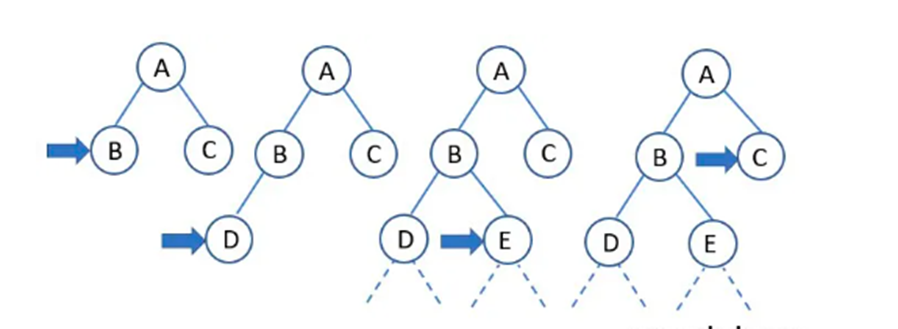

When the graph has cycles: This is interesting as there is no visited flag in IDDFS.

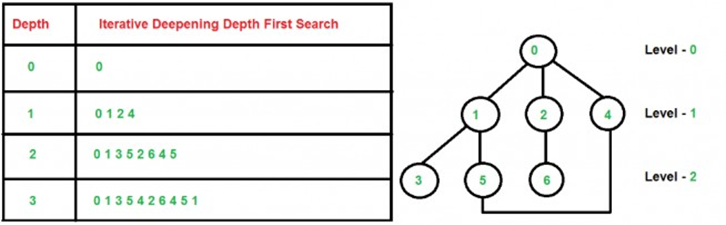

### Implementation:

In [1]:
class Stack:
    def __init__(self):
        self.items = []

    def is_empty(self):
        return len(self.items) == 0

    def push(self, item):
        self.items.append(item)

    def pop(self):
        if not self.is_empty():
            return self.items.pop()

def DLS(graph, start, search, depth_limit):
    visited = set()
    stack = Stack()
    stack.push((start, 0))

    while not stack.is_empty():
        node, depth = stack.pop()
        if node not in visited:
            print(f"{node} (Depth: {depth})") # printin the value of the poped node with its depth
            visited.add(node)
            if node == search:
                return search
            if depth < depth_limit:
                neighbors = graph[node]
                for neighbor in neighbors:
                    if neighbor not in visited:
                        stack.push((neighbor, depth + 1))
    return None

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

print("Search Found: ",DLS(graph, 'A', 'E', 2))


A (Depth: 0)
C (Depth: 1)
F (Depth: 2)
B (Depth: 1)
E (Depth: 2)
Search Found:  E


##  Iterative Deepening Search/ Iterative Deepening Depth First Search

This is the extended version of Depth-Limited Search and it only continues to itertrate till it found the result or reaches the end node.

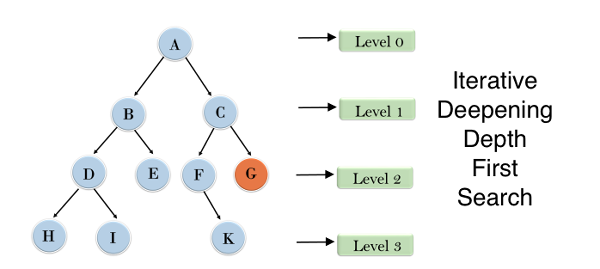

## Priority Queue

A priority queue is a special type of queue in which each element is associated with a priority value. And, elements are served on the basis of their priority. That is, higher priority elements are served first. However, if elements with the same priority occur, they are served according to their order in the queue. 
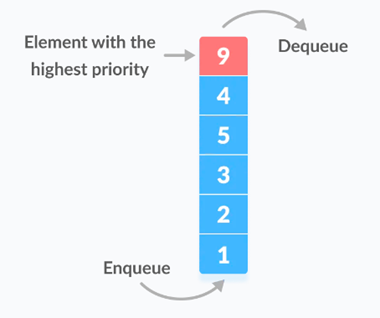

In [2]:
import queue

class WeightedGraph:
  def __init__(self):
    self.graph = {}

  def add_edge(self,start,end,weight):
    if start not in self.graph:
      self.graph[start] = []
    self.graph[start].append((end,weight))
  
  def get_neighbours(self,node):
    return self.graph.get(node,[])

def priority_queue_for_graph(graph):
  pq = queue.PriorityQueue()
  pq.put(('A',0)) # adding the first node in priority queue

  while not pq.empty():
    current_node, current_priority = pq.get()
    print(f"Processing {current_node} with priority { current_priority}")
    for neighbor , weight in graph.get_neighbours(current_node):
      next_priority = current_priority + weight
      pq.put((neighbor, next_priority))

# a : [(b,5),(c,3)]

g = WeightedGraph()
g.add_edge('A','B', 5)
g.add_edge('A','C', 3)
g.add_edge('B','C', 2)
g.add_edge('B','D', 4)
g.add_edge('C','D', 6)

result = priority_queue_for_graph(g)

Processing A with priority 0
Processing B with priority 5
Processing C with priority 3
Processing C with priority 7
Processing D with priority 9
Processing D with priority 9
Processing D with priority 13


## Uniform Cost Search

Uniform-cost search is an uninformed search algorithm that uses the lowest cumulative cost to find a path from the source to the destination. Nodes are expanded, starting from the root, according to the minimum cumulative cost. The uniform-cost search is then implemented using a Priority Queue.

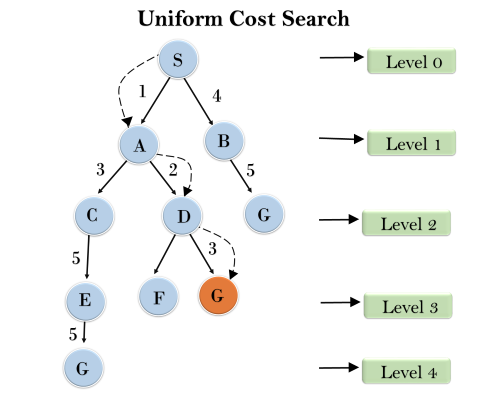

### Implementation:

In [3]:
import heapq

def uniform_cost_search(graph, start, goal):
    heap = [(0, start)]
    visited = set()
    came_from = {}  # Dictionary to store parent nodes
    cost_so_far = {node: float('inf') for node in graph}
    cost_so_far[start] = 0

    while heap:
        current_cost, current_node = heapq.heappop(heap)

        if current_node == goal:
            path = []
            while current_node in came_from:
                path.append(current_node)
                current_node = came_from[current_node]
            path.append(start)
            return path[::-1]  # Return reversed path so that the result will be print from start to end goal

        visited.add(current_node)

        for neighbor, cost in graph[current_node].items():
            new_cost = cost_so_far[current_node] + cost
            if new_cost < cost_so_far[neighbor] and neighbor not in visited:
                cost_so_far[neighbor] = new_cost
                heapq.heappush(heap, (new_cost, neighbor))
                came_from[neighbor] = current_node

    return None  # Path not found

graph = {
    'A': {'B': 5, 'C': 3},
    'B': {'D': 9, 'E': 4},
    'C': {'F': 7},
    'D': {'G': 5},
    'E': {'G': 6},
    'F': {'G': 3},
    'G': {}
}

start_node = 'A'
goal_node = 'F'

print("Path Found:",uniform_cost_search(graph, start_node, goal_node))

Path Found: ['A', 'C', 'F']


## A*

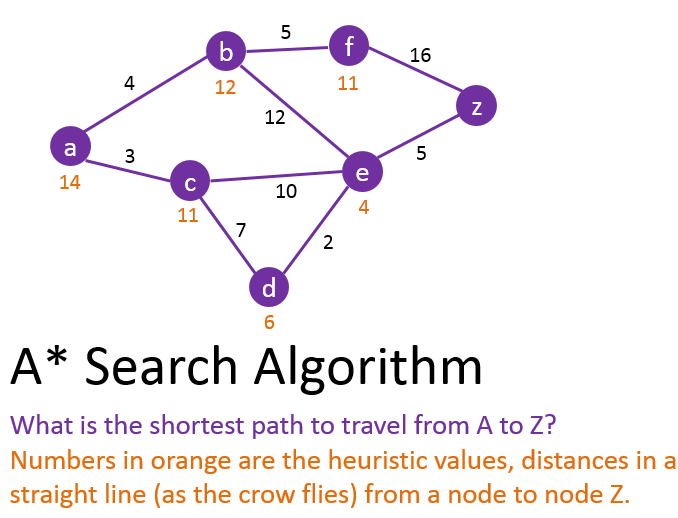

### Implementation:

In [4]:
import heapq

def astar(graph, start, goal, heuristic):
    open_set = []  # Priority queue to store nodes to be evaluated
    heapq.heappush(open_set, (0, start))  # (f_score, node)
    came_from = {}  # Dictionary to store parent nodes
    g_score = {node: float('inf') for node in graph}  # Cost from start along the best known path
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph}  # Estimated total cost from start to goal
    f_score[start] = heuristic(start, goal)

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # Return reversed path (from start to goal)

        for neighbor in graph[current]:
            tentative_g_score = g_score[current] + graph[current][neighbor]
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # Path not found

graph = {
    'A': {'B': 5, 'C': 3},
    'B': {'D': 9, 'E': 4},
    'C': {'F': 7},
    'D': {'G': 5},
    'E': {'G': 6},
    'F': {'G': 3},
    'G': {}
}

def heuristic(node, goal):
    heuristic_cost = {
        'A': 10, 'B': 9, 'C': 7,
        'D': 8, 'E': 8, 'F': 3,
        'G': 0
    }
    return heuristic_cost[node]

start_node = 'A'
goal_node = 'G'

print("Path Found:",astar(graph, start_node, goal_node, heuristic))

Path Found: ['A', 'C', 'F', 'G']
